# Test Case 1: Coral Reef Health Monitor

**Use Case:** Marine Biologist studying bleaching events and reef recovery patterns across global coral ecosystems

**Dataset:** NOAA Coral Reef Watch Satellite Monitoring (NetCDF format)

**Goal:** 
- Explore the NetCDF data structure
- Test data profile extraction
- Create informative visualizations for coral health monitoring


In [ ]:
# Setup
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

# Add project to path
sys.path.insert(0, str(Path.cwd()))

import vibe_widget as vw
from vibe_widget.data_parser.preprocessor import preprocess_data, DataPreprocessor

# Set API key (or use environment variable)
import os
API_KEY = os.getenv("ANTHROPIC_API_KEY")

print("Setup complete!")


Setup complete!


## Step 1: Exploratory Data Analysis (EDA)


In [2]:
# Load the NetCDF file
data_path = Path("testdata/20190722000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended-GLOB-v02.0-fv01.0.nc")

print(f"Loading: {data_path}")
print(f"File exists: {data_path.exists()}")
print(f"File size: {data_path.stat().st_size / (1024*1024):.2f} MB")

# Open with xarray
ds = xr.open_dataset(data_path)
print("\n" + "="*60)
print("Dataset Overview")
print("="*60)
print(ds)


Loading: testdata/20190722000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended-GLOB-v02.0-fv01.0.nc
File exists: True
File size: 18.55 MB

Dataset Overview
<xarray.Dataset> Size: 415MB
Dimensions:           (time: 1, lat: 3600, lon: 7200)
Coordinates:
  * time              (time) datetime64[ns] 8B 2019-07-22T12:00:00
  * lat               (lat) float32 14kB -89.97 -89.93 -89.88 ... 89.93 89.97
  * lon               (lon) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
Data variables:
    analysed_sst      (time, lat, lon) float32 104MB ...
    analysis_error    (time, lat, lon) float32 104MB ...
    sea_ice_fraction  (time, lat, lon) float32 104MB ...
    mask              (time, lat, lon) float32 104MB ...
Attributes: (12/47)
    Conventions:                CF-1.4, Unidata Observation Dataset v1.0
    title:                      Analysed blended sea surface temperature over...
    summary:                    An SST estimation scheme which combines multi...
    references:                 

In [3]:
# Explore dimensions
print("Dimensions:")
for dim, size in ds.dims.items():
    print(f"  {dim}: {size}")

print("\nCoordinates:")
for coord in ds.coords:
    print(f"  {coord}: {ds.coords[coord].values.shape}")

print("\nData Variables:")
for var in ds.data_vars:
    print(f"  {var}:")
    print(f"    Shape: {ds[var].shape}")
    print(f"    Dtype: {ds[var].dtype}")
    if 'long_name' in ds[var].attrs:
        print(f"    Description: {ds[var].attrs['long_name']}")
    if 'units' in ds[var].attrs:
        print(f"    Units: {ds[var].attrs['units']}")
    print()


Dimensions:
  time: 1
  lat: 3600
  lon: 7200

Coordinates:
  time: (1,)
  lat: (3600,)
  lon: (7200,)

Data Variables:
  analysed_sst:
    Shape: (1, 3600, 7200)
    Dtype: float32
    Description: analysed sea surface temperature
    Units: kelvin

  analysis_error:
    Shape: (1, 3600, 7200)
    Dtype: float32
    Description: estimated error standard deviation of analysed_sst
    Units: kelvin

  sea_ice_fraction:
    Shape: (1, 3600, 7200)
    Dtype: float32
    Description: sea ice fraction
    Units: 1

  mask:
    Shape: (1, 3600, 7200)
    Dtype: float32
    Description: sea/land/ice bit mask



/var/folders/v7/wpbns06j4k916t2k95n8wkvm0000gn/T/ipykernel_23279/3045550599.py:3: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  for dim, size in ds.dims.items():
<frozen _collections_abc>:861: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.


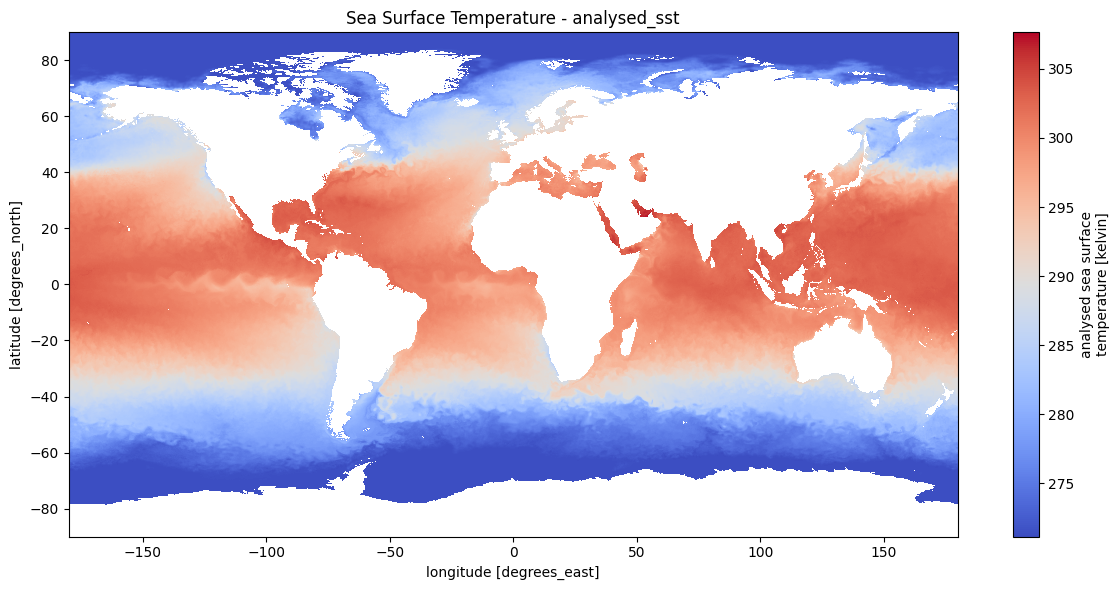


analysed_sst Statistics:
  Min: 271.15
  Max: 307.64
  Mean: 287.37
  Std: 11.59


In [4]:
# Quick visualization of the data
if 'analysed_sst' in ds.data_vars or 'sst' in ds.data_vars:
    var_name = 'analysed_sst' if 'analysed_sst' in ds.data_vars else 'sst'
    sst = ds[var_name]
    
    # Get a single time slice
    if 'time' in sst.dims:
        sst_slice = sst.isel(time=0)
    else:
        sst_slice = sst
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    sst_slice.plot(ax=ax, cmap='coolwarm')
    plt.title(f"Sea Surface Temperature - {var_name}")
    plt.tight_layout()
    plt.show()
    
    # Statistics
    print(f"\n{var_name} Statistics:")
    print(f"  Min: {float(sst.min().values):.2f}")
    print(f"  Max: {float(sst.max().values):.2f}")
    print(f"  Mean: {float(sst.mean().values):.2f}")
    print(f"  Std: {float(sst.std().values):.2f}")


## Step 2: Test Data Profile Extraction


In [5]:
# Create data profile with LLM augmentation
print("Creating data profile...")
profile = preprocess_data(
    data_path,
    api_key=API_KEY,
    augment=True,
    # context={
    #     "domain": "oceanography",
    #     "description": "NOAA Coral Reef Watch satellite monitoring data for sea surface temperature",
    #     "purpose": "Monitor coral reef health by tracking temperature patterns that cause bleaching events"
    # }
)

print("\n" + "="*60)
print("Data Profile Summary")
print("="*60)
print(profile.to_markdown())


Creating data profile...

Data Profile Summary
# Dataset Profile: netcdf
**Source:** `testdata/20190722000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended-GLOB-v02.0-fv01.0.nc`

## Overview
- **Shape:** 1 × 3600 × 7200
- **Completeness:** 100.0%
- **Domain:** Oceanography / Marine Science / Climate Science
- **Purpose:** This dataset provides global high-resolution sea surface temperature (SST) analysis for monitoring ocean conditions, climate research, weather forecasting, and marine ecosystem studies. It appears to be from a satellite-based ocean observation product (likely GHRSST - Group for High Resolution Sea Surface Temperature) providing analyzed SST with error estimates and sea ice coverage at a single time snapshot.
- **Characteristics:** Time series (frequency: snapshot (single timestamp: 2019-07-22 12:00:00) - likely from a daily or sub-daily product), Geospatial (CRS: EPSG:4326 (WGS84 geographic coordinates)), Hierarchical structure

## Fields

### `analysed_sst` (numeric)
*Anal

## Step 3: Create Visualization Widget

Now let's use the vibe widget to create an interactive visualization based on the data profile.


In [6]:
# Convert NetCDF to DataFrame for widget (sample for performance)
# For large datasets, we'll sample the data
if 'time' in ds.dims:
    # Sample every Nth time step
    time_step = max(1, len(ds.time) // 10)  # Get ~10 time steps
    ds_sample = ds.isel(time=slice(0, None, time_step))
else:
    ds_sample = ds

# Convert to DataFrame
df = ds_sample.to_dataframe().reset_index()

# Remove any infinite or very large values
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=[col for col in df.columns if df[col].dtype in [np.float64, np.float32]], how='all')

# sample 1000 rows
df = df.sample(1000)

print(f"DataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst few rows:")
df.head()


DataFrame shape: (1000, 7)
Columns: ['time', 'lat', 'lon', 'analysed_sst', 'analysis_error', 'sea_ice_fraction', 'mask']

First few rows:


,time,lat,lon,analysed_sst,analysis_error,sea_ice_fraction,mask
18820013,2019-07-22 12:00:00,40.674999,140.675003,NaN,NaN,0.00,2.0
23578909,2019-07-22 12:00:00,73.724998,125.474998,279.299988,0.11,0.46,1.0
15314264,2019-07-22 12:00:00,16.325001,173.225006,301.850006,0.07,0.00,1.0
13006121,2019-07-22 12:00:00,0.325000,-33.924999,300.410004,0.06,0.00,1.0
17641888,2019-07-22 12:00:00,32.525002,-85.574997,NaN,NaN,0.00,2.0


In [7]:
# Create widget with enhanced description based on profile
description = """
Create an interactive coral reef health monitoring visualization that shows:
- Sea surface temperature heatmap over time
- Time slider to explore temporal patterns
- Highlight areas where temperature exceeds bleaching thresholds (typically >30°C)
"""

widget = vw.create(
    description,
    df,
    api_key=API_KEY,
    context=profile
)


Create an interactive coral reef health monitoring visualization that shows:
- Sea surface temperature heatmap over time
- Time slider to explore temporal patterns
- Highlight areas where temperature exceeds bleaching thresholds (typically >30°C)


Data Profile: # Dataset Profile: netcdf
**Source:** `testdata/20190722000000-OSPO-L4_GHRSST-SSTfnd-Geo_Polar_Blended-GLOB-v02.0-fv01.0.nc`

## Overview
- **Shape:** 1 × 3600 × 7200
- **Completeness:** 100.0%
- **Domain:** Oceanography / Marine Science / Climate Science
- **Purpose:** This dataset provides global high-resolution sea surface temperature (SST) analysis for monitoring ocean conditions, climate research, weather forecasting, and marine ecosystem studies. It appears to be from a satellite-based ocean observation product (likely GHRSST - Group for High Resolution Sea Surface Temperature) providing analyzed SST with error estimates and sea ice coverage at a single time snapshot.
- **Characteristics:** Time series (frequency: snapsh